<a href="https://colab.research.google.com/github/arkeodev/demistify_deep_learning_applications/blob/main/YOLO_Object_Detection_From_Theory_to_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO Object Detection: From Theory to Implementation

Object detection is a crucial task in computer vision that involves identifying and localizing objects within an image. Among the numerous approaches to object detection, YOLO (You Only Look Once) has emerged as one of the most effective and efficient methods. In this blog post, we delve into the fundamentals of YOLO object detection, its implementation, and the implementation in PyTorch, with a focus on practical application using the COCO dataset.

## Understanding YOLO Object Detection

Understanding the core concepts behind YOLO (You Only Look Once) object detection is essential for mastering how it revolutionizes object detection tasks, particularly in terms of speed and accuracy. Let's delve deeper into the intricacies of YOLO, the concept of bounding boxes, and the crucial metric of Intersection Over Union (IoU).

### Deep Dive into YOLO Object Detection

YOLO fundamentally changes the object detection landscape by treating the task as a single regression problem from image pixels to bounding box coordinates and class probabilities. This approach contrasts sharply with traditional methods, which typically involve a two-step process: first proposing candidate regions (region proposals) and then classifying each region into various categories.

#### How YOLO Works:

1. **Single Convolutional Network:** YOLO uses a single convolutional network to predict multiple bounding boxes and class probabilities for those boxes simultaneously. This end-to-end training and prediction model dramatically increases the speed of detection.

2. **Spatial Division of Images:** The image is divided into an $(S×S$) grid, and for each grid cell, YOLO predicts $(B$) bounding boxes and confidence scores for those boxes. Confidence reflects the accuracy of the bounding box and the probability that the box contains a specific object.

3. **Class Probabilities:** Alongside bounding box predictions, YOLO also predicts class probabilities for each grid cell, irrespective of the number of boxes $(B$).

#### Advantages:

**Speed:** By simplifying the detection into a single network forward pass, YOLO achieves remarkable speed, making it suitable for real-time applications.

**Global Context:** Unlike region proposal-based methods, YOLO sees the entire image during training and test time, allowing it to implicitly encode contextual information about classes.

### The Concept of Bounding Boxes

Bounding boxes are pivotal in object detection, serving as the basic element for localizing objects within an image. A bounding box is defined by four parameters: the $(x$) and $(y$) coordinates of the upper-left corner, and the width $(w$) and height $(h$) of the rectangle. These parameters enable the precise localization and identification of objects in an image, from a simple person to complex scenes with multiple interacting objects

#### Challenges with Bounding Boxes:

**Accuracy:** Precisely predicting the size and location of bounding boxes is challenging, especially with objects of varying scales and orientations.

**Overlap:** In densely populated scenes, handling overlapping boxes requires careful consideration, often addressed through techniques like Non-Maximum Suppression (NMS).

### Intersection Over Union (IoU)

IoU is a fundamental metric in object detection used to quantify the accuracy of a predicted bounding box against the ground truth. It is defined as the ratio of the area of overlap between the predicted bounding box and the ground truth box to the area of their union.

#### IoU Calculation:

$$
\text{IoU} = \frac{\text{Area of Overlap}}{\text{Area of Union}}
$$



#### Importance of IoU:

**Performance Evaluation:** IoU provides a clear and straightforward measure to evaluate and compare the performance of object detection models.

**Training Optimization:** By integrating IoU into the loss function, models can be trained more effectively to predict accurate bounding boxes.

#### Challenges and Solutions:

**Small Objects:** Detecting small objects can be difficult due to their limited presence in the image. Strategies like using higher resolution input images or focusing on specific layers of the network that retain fine-grained details can help.

**Class Imbalance:** Some classes might be overrepresented in the training data. Techniques such as focal loss or oversampling smaller classes can mitigate this issue.

In summary, the YOLO object detection system, with its innovative approach to bounding box prediction and class probability estimation, coupled with the critical metric of IoU, presents a powerful tool for real-time, accurate object detection across a wide range of applications. Understanding these concepts deeply not only aids in leveraging YOLO's full potential but also in navigating the challenges inherent in object detection tasks.

## Dataset and Preprocessing

For our implementation, we utilize the COCO dataset, which is widely used for object detection, segmentation, and captioning tasks. The dataset comes in the COCO format, providing a standardized way to work with complex object detection data.

The COCO (Common Objects in Context) dataset is a large-scale object detection, segmentation, and captioning dataset. The COCO format is a specific way that the dataset annotates images, making it a standard for various computer vision tasks. This format is particularly designed to facilitate the training and evaluation of algorithms on the dataset

### Understanding the COCO Format

The COCO dataset format organizes annotation information in a structured JSON file, which includes:

**Images:** A list of images with their file names, image IDs, URLs, height, and width.

**Annotations:** Contains details about each object instance in the images, including:
* Object bounding box coordinates (in the format `[x, y, width, height]`).
* The category ID of the object.
* An annotation ID unique to each object instance.
* Segmentation information for instance segmentation tasks.

**Categories:** Lists all object categories in the dataset, each with a unique category ID and name.

This structured format allows for easy parsing and utilization in training object detection models, supporting tasks like bounding box object detection and instance segmentation.

```
annotation{
  "id": int,
  "image_id": int,
  "category_id": int,
  "segmentation": RLE or [polygon],
  "area": float,
  "bbox": [x,y,width,height],
  "iscrowd": 0 or 1,
}

categories[{
  "id": int,
  "name": str,
  "supercategory": str,
}]
```

The COCO dataset can be accessed and downloaded from the [COCO Dataset Official Website](https://cocodataset.org/#home). Here, you can find links to download the images and annotations for different years and tasks, along with additional resources and tools for working with the dataset.

### Alternatives to the COCO Format

An alternative to the COCO format is the PASCAL VOC format, used by the PASCAL Visual Object Classes challenges. The VOC format stores annotations in XML files, with each file corresponding to an image in the dataset. While also widely used, the COCO format has become more popular for several reasons, particularly due to its support for a larger number of images and more detailed annotations, including instance segmentation masks.

### Why Prefer COCO Dataset and Format?

* **Diversity and Size:** The COCO dataset includes over 200,000 images with more than 500,000 object instances across 80 categories, offering a diverse and substantial volume of data for robust model training.

* **Multiple Tasks Support:** The COCO format supports various computer vision tasks, including object detection, segmentation, and image captioning, making it versatile for different applications.

* **Standardization:** The structured JSON format allows for consistency and standardization in data annotation, facilitating easier data parsing and model evaluation.

* **Community and Tools:** The widespread adoption of the COCO dataset has led to the development of numerous tools and libraries designed to work with COCO-formatted data, as well as a large community of researchers and developers contributing to continual improvements.

### Download the Data

First, let's create the directory structure where the dataset will be stored.

In [1]:
!mkdir -p coco/images/train2017 coco/images/val2017 coco/annotations

Next, use the following commands to download the training and validation images and annotations for the COCO 2017 dataset. Note that these files are quite large, so the download may take some time depending on your internet connection.

In [2]:
! wget http://images.cocodataset.org/zips/train2017.zip -P coco/images
! wget http://images.cocodataset.org/zips/val2017.zip -P coco/images
! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco/annotations

--2024-03-03 19:23:59--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.124.25, 3.5.16.126, 16.182.32.249, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.124.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco/images/train2017.zip’

train2017.zip       100%[===================>]  18.01G  15.4MB/s    in 19m 58s 

2024-03-03 19:43:57 (15.4 MB/s) - ‘coco/images/train2017.zip’ saved [19336861798/19336861798]

--2024-03-03 19:43:57--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.108.188, 52.217.199.169, 52.217.169.217, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.108.188|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco/images/val2017.zip’

val2017.zi

After downloading, unzip the files to their respective directories.

In [3]:
! unzip -q coco/images/train2017.zip -d coco/images
! unzip -q coco/images/val2017.zip -d coco/images
! unzip -q coco/annotations/annotations_trainval2017.zip -d coco/annotations

After executing these commands, your folder structure should look like this:

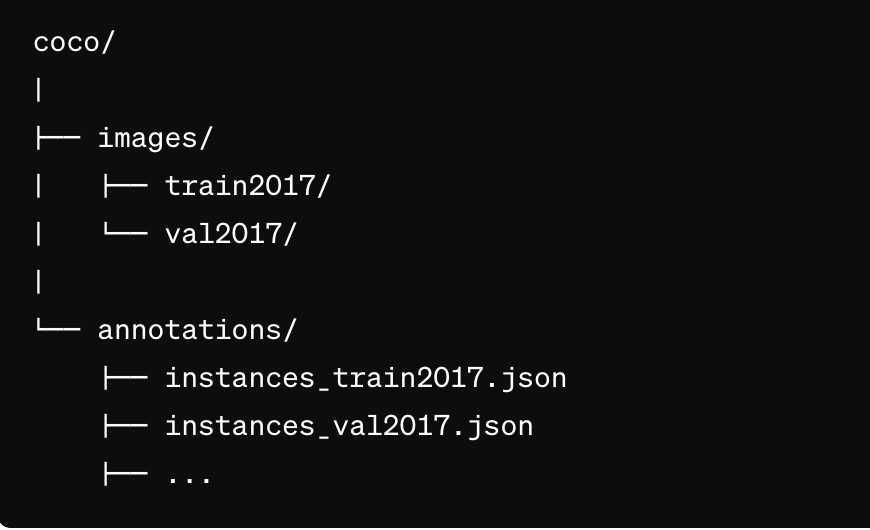


Optionally, after unzipping, you can remove the downloaded .zip files to save space.

In [4]:
! rm coco/images/train2017.zip
! rm coco/images/val2017.zip
! rm coco/annotations/annotations_trainval2017.zip

#### Imports

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange, tqdm

### Dataset Preparation

Before diving into model building, it's crucial to prepare the dataset. For object detection, loading the images along with their corresponding bounding boxes and class labels.

In [31]:
from torchvision.datasets import CocoDetection
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

class CustomCocoDetection(CocoDetection):
    def __init__(self, root, annFile, transform=None):
        super(CustomCocoDetection, self).__init__(root, annFile)
        self.transform = transform

    def __getitem__(self, index):
        # Load an image and its bounding box coordinates
        img, target = super(CustomCocoDetection, self).__getitem__(index)

        # Extract bounding boxes and category IDs as separate lists
        boxes = [obj["bbox"] for obj in target]
        category_ids = [obj["category_id"] for obj in target]

        # Convert the PIL image to a numpy array
        img = np.array(img)

        if self.transform:
            # Apply transformations using named arguments
            transformed = self.transform(image=img, bboxes=boxes, class_labels=category_ids)
            img = transformed["image"]
            target = {"bboxes": transformed["bboxes"], "category_ids": transformed["class_labels"]}

        # Note: You may need to convert the transformed bboxes and class_labels
        # back to the COCO target format if necessary for your application

        return img, target


In [6]:
from torchvision.datasets import CocoDetection
import torchvision.transforms as T

class CustomCocoDetection(CocoDetection):
    def __init__(self, root, annFile, transform=None):
        super(CustomCocoDetection, self).__init__(root, annFile)
        self.transform = transform

    def __getitem__(self, index):
        img, target = super(CustomCocoDetection, self).__getitem__(index)
        # Transform target format from COCO to YOLO (if necessary)
        # Apply transformations to the image
        if self.transform:
            img = self.transform(img)
        return img, target

In [38]:
from torch.utils.data._utils.collate import default_collate

def custom_collate_fn(batch):
    """Custom collate function for handling images with variable numbers of bounding boxes."""
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    # Use default_collate for images since they have a fixed size after transformations
    images = default_collate(images)

    # Targets do not need collating if your model and loss function can handle variable-length lists
    # Alternatively, you can pad targets to the same size here if necessary

    return images, targets


#### Preprocessing Steps

**Data Augmentation:** Techniques like random cropping, flipping, and color jittering are applied to increase the diversity of the training data, which helps in improving the model's robustness.

Albumentations is a fast and flexible image augmentation library that provides a wide array of efficient and diverse augmentation techniques. This library is specifically designed to meet the needs of deep learning tasks in computer vision, offering support for augmentation of images, masks, bounding boxes, and keypoints.

Let's break down each transformation and discuss the advantages of using Albumentations over standard PyTorch transforms.

1. A.SmallestMaxSize(max_size=image_size): Resizes the input image so that the smaller side matches image_size while maintaining the aspect ratio. This ensures that the image is correctly scaled for the network without distortion.

2. A.RandomCrop(height=image_size, width=image_size): Crops a random part of the input image with the specified height and width. This adds variability to the dataset, helping the model generalize better by learning to recognize objects from various parts of an image.

3. A.HorizontalFlip(p=0.5): Flips the input image horizontally with a probability of 0.5. This augmentation technique increases the dataset diversity without affecting the object's class, aiding in robustness against orientation changes.

4. A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5): Randomly applies affine transforms: translation, scaling, and rotation. This exposes the model to a variety of object perspectives and scales, enhancing its ability to detect objects under different transformations.

5. A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5): Shifts the RGB values of the image. This simulates variations in lighting conditions and camera characteristics, which is useful for real-world application robustness.

6. A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5): Randomly changes brightness and contrast, which helps the model adapt to various lighting conditions.

7. A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]): Normalizes pixel values based on the mean and std. This standardization step is crucial for models pre-trained on ImageNet, as it aligns the new input data with the data distribution seen during pre-training.

8. ToTensorV2(): Converts the input image to a PyTorch tensor and reorders the image channels.

The bbox_params argument specifies how bounding boxes should be treated during augmentations. It ensures that transformations like cropping or scaling are consistently applied to both the image and its associated bounding boxes.

In [32]:
image_size = 416

# You'll need to install albumentations!
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transform = A.Compose([A.SmallestMaxSize(max_size=image_size),
                             A.RandomCrop(height=image_size, width=image_size),
                             A.HorizontalFlip(p=0.5),
                             A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
                             A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.5),
                             A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.5),
                             A.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225]),
                            ToTensorV2()],
                            bbox_params=A.BboxParams(format='coco',
                                                     min_area=0, min_visibility=0.0,
                                                     label_fields=['class_labels']))

inference_transform = A.Compose([A.SmallestMaxSize(max_size=image_size),
                       A.RandomCrop(height=image_size, width=image_size),
                       A.Normalize(mean=[0.485, 0.456, 0.406],
                                   std=[0.229, 0.224, 0.225]),
                       ToTensorV2()],
                       bbox_params=A.BboxParams(format='coco',
                                               min_area=0, min_visibility=0.0,
                                               label_fields=['class_labels']))

In [33]:
train_data = CustomCocoDetection(root='./coco/images/train2017',
                                 annFile='./coco/annotations/annotations/instances_train2017.json',
                                 transform=train_transform)


loading annotations into memory...
Done (t=29.70s)
creating index...
index created!


In [34]:
val_data = CustomCocoDetection(root='./coco/images/val2017',
                                 annFile='./coco/annotations/annotations/instances_val2017.json',
                                 transform=inference_transform)

loading annotations into memory...
Done (t=0.72s)
creating index...
index created!


In [39]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)

#### Determining the Device Type

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using {device} device')

Using cpu device


## Model Architecture

We employ a pretrained network for feature extraction, utilizing transfer learning to improve efficiency and accuracy. Specifically, we modify ResNet34, pretrained on ImageNet, to suit our object detection task. The model's final layer is adapted to predict bounding boxes and class probabilities.

The YOLO object detection model consists of two primary components:

**Feature Extractor:** Utilizes a pretrained ResNet-34 model, with its final layer removed, to extract meaningful features from input images. ResNet-34 is chosen for its balance between accuracy and computational efficiency, making it suitable for a wide range of object detection tasks. The feature extractor processes input images to produce a set of feature maps that encode spatial hierarchies of features learned from vast amounts of visual data.

**Detection Layer:** A custom sequence of layers designed to interpret the feature maps and output object detection predictions. This component includes a flattening layer to transform the feature maps into a vector, followed by fully connected layers and nonlinear activations to predict the properties of bounding boxes (location, size) and the probabilities of object classes within each grid cell of the image.

In [15]:
import torch
import torch.nn as nn
import torchvision.models as models

class YOLOObjectDetector(nn.Module):
    """
    YOLO Object Detection model leveraging a pretrained backbone for feature extraction.

    Attributes:
        feature_extractor (nn.Sequential): Feature extraction model.
        detection_layer (nn.Sequential): Custom layer to output detection predictions.
        image_size (int): The size of the input images (square images).
        grid_size (int): The dimension of the output grid (S x S).
        num_boxes (int): Number of bounding boxes (B) to predict per grid cell.
        num_classes (int): Number of object classes (C).
    """
    def __init__(self, backbone, image_size, grid_size, num_boxes, num_classes):
        """
        Initializes the YOLO object detection model with a given backbone.

        Parameters:
            backbone (nn.Module): Pretrained CNN model to use as the feature extraction backbone.
            image_size (int): Size of the input images. Assumes square images.
            grid_size (int): The dimension of the grid size into which the image is divided.
            num_boxes (int): Number of bounding boxes to predict for each grid cell.
            num_classes (int): Number of object classes for classification.
        """
        super(YOLOObjectDetector, self).__init__()
        self.image_size = image_size
        self.grid_size = grid_size
        self.num_boxes = num_boxes
        self.num_classes = num_classes

        # Modify the backbone by removing the final layer
        self.feature_extractor = nn.Sequential(*list(backbone.children())[:-2])

        # Calculate the size of the flattened features after the feature extractor
        dummy_input = torch.autograd.Variable(torch.rand(1, 3, image_size, image_size))
        features_size = self.feature_extractor(dummy_input).data.view(1, -1).size(1)

        # Define the final layer to output the detection predictions
        self.detection_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(features_size, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096, grid_size * grid_size * (num_classes + num_boxes * 5)),
        )

    def forward(self, x):
        """
        Forward pass of the model.

        Parameters:
            x (torch.Tensor): Input tensor of images.

        Returns:
            torch.Tensor: The model's predictions for each image.
        """
        features = self.feature_extractor(x)
        predictions = self.detection_layer(features)
        output_shape = (-1, self.grid_size, self.grid_size, (self.num_classes + self.num_boxes * 5))
        return predictions.reshape(output_shape)

### Understanding the Output Size Calculation

The output size of the YOLO object detection model is calculated as $(grid\_size * grid\_size * (num\_classes + num\_boxes * 5)$) to encapsulate all the necessary information for detecting objects within an image. This formula is a direct consequence of the YOLO model's design, which divides the image into a grid and predicts bounding boxes and class probabilities for each cell in the grid. Let's break down the components of this formula:

1. grid_size * grid_size:

The image is divided into a grid of size grid_size x grid_size. For each cell in this grid, the model will make predictions. This division allows the model to localize objects by determining which grid cell they belong to.

2. num_classes:
For each grid cell, the model predicts the probabilities of each class that the cell may contain. This requires num_classes outputs per cell, allowing the model to classify the detected objects into one of the predefined categories.

3. num_boxes:
Each grid cell predicts num_boxes bounding boxes. These boxes are the model's candidates for enclosing objects detected within the cell. Multiple boxes per cell allow the model to propose different shapes and sizes, improving its ability to accurately bound objects.
4. *5: For each bounding box, the model outputs 5 values:

* x and y coordinates of the box's center relative to the bounds of the grid cell.
* width and height of the box, usually normalized by the image's width and height.
* A confidence score that represents the likelihood of the box containing an object and how accurate the box is expected to be. This score is a combination of objectness (the probability that there is an object) and IoU (Intersection over Union) between the predicted box and the ground truth.

Putting it all together, for each grid cell, the model outputs a vector of length $((num_classes + num_boxes * 5)$). Since there are $(grid\_size * grid\_size$) cells, the total output size becomes $(grid\_size * grid\_size * (num\_classes + num\_boxes * 5)$).

**Why This Output Structure?**

This structure is key to YOLO's single-shot detection capability. By predicting bounding boxes and class probabilities simultaneously for each grid cell, YOLO can detect multiple objects across different classes in a single forward pass through the network. This approach contrasts with two-stage detectors that first propose regions and then classify them, resulting in greater efficiency and speed, which are critical for real-time applications.

## YOLO Loss Function

Implementing the YOLO loss function is a critical step in training the YOLO object detection model. The loss function is designed to optimize several aspects of the predictions, including the size and location of bounding boxes, the confidence score of those boxes, and the class predictions. Below is a more detailed implementation of the YOLOLoss class, which outlines how these components can be combined to train the YOLO model effectively.

The YOLO loss function can be broken down into several components:

1. Localization Loss: Measures the error in the predicted bounding box coordinates compared to the ground truth.
2. Confidence Loss: Penalizes the model for incorrect objectness predictions.
3. Classification Loss: Measures the error in classifying the objects within the bounding boxes.

In [17]:
class YOLOLoss(nn.Module):
    def __init__(self, grid_size, num_boxes, num_classes, lambda_coord=5, lambda_noobj=0.5):
        super(YOLOLoss, self).__init__()

        self.grid_size = grid_size  # grid size
        self.num_boxes = num_boxes  # number of bounding boxes
        self.num_classes = num_classes  # number of classes

        self.lambda_coord = lambda_coord
        self.lambda_noobj = lambda_noobj

    def forward(self, predictions, target):
        # Reshape predictions and target to (batch_size, S, S, C+B*5)
        predictions = predictions.reshape(-1, self.grid_size, self.grid_size, self.num_classes + self.num_boxes * 5)
        target = target.reshape(-1, self.grid_size, self.grid_size, self.num_classes + self.num_boxes * 5)

        # Calculate IoU for the two predicted bounding boxes with target
        iou_b1 = self.compute_iou(predictions[..., self.num_classes+1:self.num_classes+5], target[..., self.num_classes+1:self.num_classes+5])
        iou_b2 = self.compute_iou(predictions[..., self.num_classes+6:self.num_classes+10], target[..., self.num_classes+1:self.num_classes+5])
        ious = torch.cat([iou_b1.unsqueeze(0), iou_b2.unsqueeze(0)], dim=0)
        best_iou, best_box = ious.max(0)

        # 1 for the responsible box, 0 otherwise
        exists_box = target[..., self.num_classes].unsqueeze(3)  # Identity obj_i

        # Localization Loss
        box_predictions = exists_box * (
            (
                best_box * predictions[..., self.num_classes+6:self.num_classes+10]
                + (1 - best_box) * predictions[..., self.num_classes+1:self.num_classes+5]
            )
        )
        box_targets = exists_box * target[..., self.num_classes+1:self.num_classes+5]
        box_loss = self.lambda_coord * F.mse_loss(box_predictions, box_targets, reduction="sum")

        # Confidence Loss
        obj_loss = F.mse_loss(exists_box * predictions[..., self.num_classes], exists_box * target[..., self.num_classes], reduction="sum")
        no_obj_loss = self.lambda_noobj * F.mse_loss((1 - exists_box) * predictions[..., self.num_classes], (1 - exists_box) * target[..., self.num_classes], reduction="sum")

        # Classification Loss
        class_loss = F.mse_loss(exists_box * predictions[..., :self.num_classes], exists_box * target[..., :self.num_classes], reduction="sum")

        total_loss = box_loss + obj_loss + no_obj_loss + class_loss
        return total_loss

    def compute_iou(self, box1, box2):
        """
        Computes the IoU between two sets of boxes.
        box1, box2: (x, y, w, h)
        """
        # Transform from (x, y, w, h) to (x1, y1, x2, y2)
        box1 = torch.cat([box1[..., :2] - box1[..., 2:] * 0.5, box1[..., :2] + box1[..., 2:] * 0.5], dim=-1)
        box2 = torch.cat([box2[..., :2] - box2[..., 2:] * 0.5, box2[..., :2] + box2[..., 2:] * 0.5], dim=-1)

        # Intersection area
        inter = (torch.min(box1[..., 2:], box2[..., 2:]) - torch.max(box1[..., :2], box2[..., :2])).clamp(0).prod(2)

        # Union Area
        area1 = ((box1[..., 2]-box1[..., 0]) * (box1[..., 3]-box1[..., 1]))
        area2 = ((box2[..., 2]-box2[..., 0]) * (box2[..., 3]-box2[..., 1]))
        union = area1 + area2 - inter

        return inter / union  # IoU


This implementation introduces several hyperparameters, such as ***lambda_coord*** and ***lambda_noobj***, which are used to balance the different components of the loss function. Adjusting these parameters can have a significant impact on the model's performance, particularly in terms of balancing the trade-off between localization accuracy and confidence in predictions.

By breaking down the YOLO loss into its constituent parts and carefully implementing the calculations, this loss function enables effective training of YOLO models on a variety of datasets.

## View Data

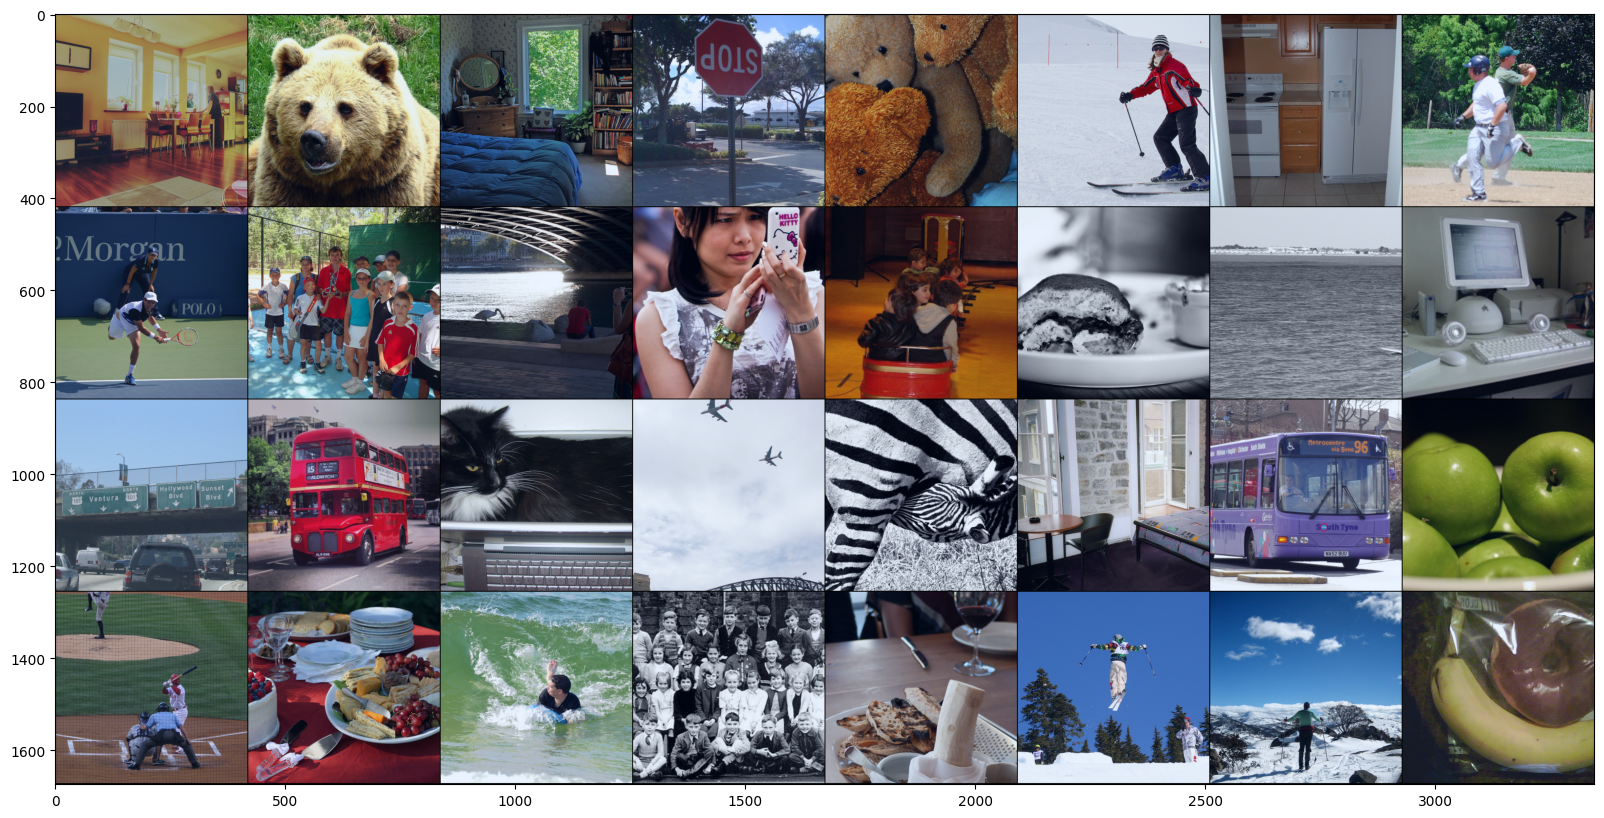

In [55]:
plt.figure(figsize = (20,10))
images, targets = next(iter(val_loader))
out = torchvision.utils.make_grid(images, normalize=True)
_ = plt.imshow(out.numpy().transpose((1, 2, 0)))

## Training

In [22]:
from torch.optim import Adam

# Parameters
image_size = 416  # Example image size, adjust as needed
grid_size = 7     # Common choice for YOLO
num_boxes = 2     # Typically 2 or 3
num_classes = 20  # Adjust based on your dataset

# Initialize the backbone
backbone = models.resnet34(pretrained=True)

# Create our network
yolo_model = YOLOObjectDetector(backbone=backbone,
                                image_size=image_size,
                                grid_size=grid_size,
                                num_boxes=num_boxes,
                                num_classes=num_classes).to(device)

# Learning rate
learning_rate = 1e-4

# Setup optimizer
optimizer = Adam(yolo_model.parameters(), lr=learning_rate)

# YOLO Loss
loss_function = YOLOLoss(grid_size=grid_size, num_boxes=num_boxes, num_classes=num_classes).to(device)

# Number of epochs
num_epochs = 10

# Evaluation metric is IOU
eval_metric = loss_function.compute_iou

loss_log = []
train_acc_logger = []
val_acc_logger = []

In [40]:
def evaluate_model(train_val="train"):
    state = "Evaluating "
    if train_val == "train":
        loader = train_loader
        state += "Train Set"
    elif train_val == "val":
        loader = val_loader
        state += "Validation Set"
    else:
        ValueError("Invalid dataset, train_val should be train/val")

    # Initialise counter
    epoch_acc = 0
    yolo_model.eval()
    with torch.no_grad():
        for i, data in enumerate(tqdm(loader, leave=False, desc=state)):
            with torch.cuda.amp.autocast():
                # Forward pass of image through network
                fx = yolo_model(data[0].to(device))

                # Log the cumulative sum of the acc
                epoch_acc += eval_metric(fx, data).sum().cpu().item()

    # Log the accuracy from the epoch
    if train_val == "train":
        train_acc_logger.append(epoch_acc / len(loader.dataset))
    elif train_val == "val":
        val_acc_logger.append(epoch_acc / len(loader.dataset))

    return epoch_acc / len(loader.dataset)


In [48]:
valid_acc = 0
train_acc = 0

yolo_model.train()

pbar = trange(0, num_epochs, leave=False, desc="Epoch")
for epoch in pbar:

    pbar.set_postfix_str('IoU: Train %.2f, Val %.2f' % (train_acc, valid_acc))

    for images, targets in tqdm(train_loader, leave=False, desc="Training"):

        images = images.to(device)

        optimizer.zero_grad()

        predictions = yolo_model(images)

        loss = loss_function(predictions, targets)

        loss_log.append(loss)

        loss.backward()

        optimizer.step()

    # Call the modules evaluate function for train and validation set
    train_acc = evaluate_model(train_test_val="train")
    valid_acc = evaluate_model(train_test_val="val")

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/3697 [00:00<?, ?it/s]

[{'bboxes': [(1.862483660130703, 187.47869281045752, 414.1375163398693, 228.33777777777783), (194.97620915032684, 123.59006535947712, 49.79084967320256, 28.406274509803936)], 'category_ids': [65, 3]}, {'bboxes': [(30.17592997811816, 68.56946875000001, 379.20630196936537, 347.43053125)], 'category_ids': [1]}, {'bboxes': [(23.85937500000003, 182.04684684684685, 25.125, 37.42126126126129), (15.965624999999987, 199.96108108108106, 24.674999999999983, 26.412252252252273), (86.38125, 233.37225225225228, 29.156250000000014, 61.08828828828831)], 'category_ids': [1, 36, 36]}, {'bboxes': [(90.44731249999998, 377.3490693069307, 9.214265625000024, 20.989465346534644), (242.00098437499994, 377.5055841584158, 9.313078125000033, 19.27603960396044), (252.05515624999998, 381.319603960396, 9.346015625000007, 15.775049504950516), (36.512156249999975, 392.12736633663366, 4.957093750000013, 8.22114851485145), (132.87081250000003, 388.1568316831683, 5.920515624999979, 11.359683168316792), (252.7715468749999

AttributeError: 'list' object has no attribute 'reshape'